In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt


In [2]:
import numpy as np
import pandas as pd
import datetime as dt


# Reflect Tables into SQLAlchemy ORM


In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func


In [4]:
# Create engine using the `hawaii.sqlite` database file
engine = create_engine("sqlite:///Resources/hawaii.sqlite")


In [5]:
#connection to the database hawaii.sqlite
engine.connect()

In [6]:
# Declare a Base using `automap_base()`

Base = automap_base()
# Use the Base class to reflect the database tables
# reflect the tables
Base.prepare(autoload_with=engine)



In [7]:
# Print all of the classes mapped to the Base
print(f"Classes found by automap_base: {Base.classes.keys()}")

Classes found by automap_base: ['measurement', 'station']


In [8]:
# Assign the measurement class to a variable called `Measurement` and
Measurement = Base.classes.measurement
# assign the station class to a variable called `Station`
Station = Base.classes.station

print(Measurement,Station)

<class 'sqlalchemy.ext.automap.measurement'> <class 'sqlalchemy.ext.automap.station'>


In [9]:
# Create a session
session = Session(engine)

# Exploratory Precipitation Analysis


In [10]:
# Find the most recent date in the data set.
most_recent_date = session.query(func.max(Measurement.date)).scalar()
print(f"The most recent date in the dataset is: {most_recent_date}")

The most recent date in the dataset is: 2017-08-23


In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.
one_year_ago = pd.to_datetime(most_recent_date) - pd.DateOffset(years=1)
one_year_ago_str = one_year_ago.strftime('%Y-%m-%d')
#print(f"Date one year ago from the most recent date is: {one_year_ago_str}")

# Perform a query to retrieve the data and precipitation scores for the last 12 months
precipitation_data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= one_year_ago_str).all()


# Save the query results as a Pandas DataFrame. Explicitly set the column names
precipitation_df = pd.DataFrame(precipitation_data, columns=['date', 'precipitation'])


# Convert the date column to datetime format
precipitation_df['date'] = pd.to_datetime(precipitation_df['date'])

# Sort the dataframe by date

precipitation_df = precipitation_df.sort_values('date')
precipitation_df.head()




,date,precipitation
0,2016-08-23,0.0
1009,2016-08-23,NaN
1529,2016-08-23,45.5
704,2016-08-23,1.3
361,2016-08-23,3.8


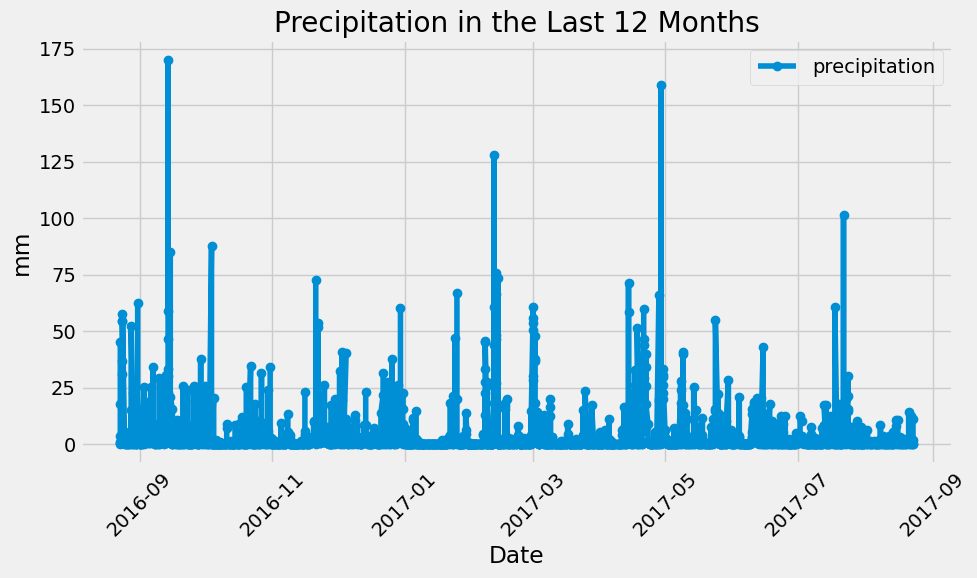

In [15]:
# Plot the data using Pandas Plotting with Matplotlib
plt.figure(figsize=(10, 6))
plt.plot(precipitation_df['date'], precipitation_df['precipitation'], marker='o', linestyle='-', label='precipitation')
plt.xlabel('Date')
plt.ylabel('mm')
plt.title('Precipitation in the Last 12 Months')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [16]:
# Use Pandas to calculate the summary statistics for the precipitation data

summary_stats = precipitation_df['precipitation'].describe()
print(summary_stats)

count    2021.000000
mean        4.505888
std        11.713487
min         0.000000
25%         0.000000
50%         0.500000
75%         3.300000
max       170.200000
Name: precipitation, dtype: float64


# Exploratory Station Analysis


In [18]:
# Design a query to calculate the total number of stations in the dataset

rows = session.query(func.count(Station.id)).scalar()
print("Number of rows in the stations are : ", rows)

Number of rows in the stations are :  9


In [19]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)

#creating the list to store total number of rows in  each station 
station_name_rows_list = []
#Here we are using station as primary key from Station table to find the matching relationship with the Measurement Table

#Getting all the station
for each_station in session.query(Station).all():
    #printing all the variables from each station
    #print(vars(each_station))
    #getting station name for each station
    #print(each_station.station)


    matched_measurements = session.query(Measurement).filter(Measurement.station == each_station.station).all()
    station_name_rows_list.append((each_station.station, len(matched_measurements)))

    
#print(station_name_rows_list)



# List the stations and their counts in descending order.

#Now creating the dataframe    
station_name_rows_dataframe = pd.DataFrame(station_name_rows_list,columns=("station","Number of Rows"))
sorted_station_name_rows_dataframe = station_name_rows_dataframe.sort_values("Number of Rows",ascending=False)
print(sorted_station_name_rows_dataframe)

       station  Number of Rows
6  USC00519281            2772
0  USC00519397            2724
1  USC00513117            2709
5  USC00519523            2669
8  USC00516128            2612
2  USC00514830            2202
7  USC00511918            1979
3  USC00517948            1372
4  USC00518838             511


In [20]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
#Getting the first row
most_active_station = sorted_station_name_rows_dataframe.station.iloc[0]
#print((most_active_station))


most_active_station_temp_df= pd.DataFrame(session.query(Measurement.tobs).filter(Measurement.station == most_active_station).all())
#print(most_active_station_temp_df)
print("Highest temperature of the most active station is ",most_active_station_temp_df.max().tobs)
print("Lowest temperature of the most active station is ",most_active_station_temp_df.min().tobs)
print("Average temperature of the most active station is ",most_active_station_temp_df.mean().tobs)


Highest temperature of the most active station is  29.4
Lowest temperature of the most active station is  12.2
Average temperature of the most active station is  22.035822510822513


In [21]:
#one_year_ago = pd.to_datetime(most_recent_date) - pd.DateOffset(years=1)
#one_year_ago_str = one_year_ago.strftime('%Y-%m-%d')
#print(f"Date one year ago from the most recent date is: {one_year_ago_str}")

# Perform a query to retrieve 12 months of temperature observation data for most active station and plot the results as a histogram
temperature_data_for_most_active_station_12_months = session.query(Measurement.date,Measurement.tobs).filter((Measurement.station==most_active_station) & (Measurement.date >= one_year_ago_str)).all()
most_active_station_temp_12_months_df = pd.DataFrame(temperature_data_for_most_active_station_12_months,columns=('Date','Temp'))
#print(most_active_station_temp_12_months_df.head())


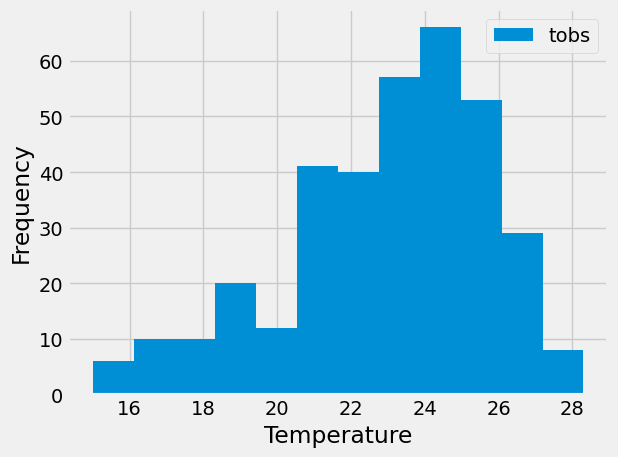

In [26]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
plt.hist(most_active_station_temp_12_months_df["Temp"],bins=12)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.legend(['tobs'])
plt.tight_layout()
plt.show()

# Close Session


In [24]:
# Close Session
session.close()
